In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [71]:
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))


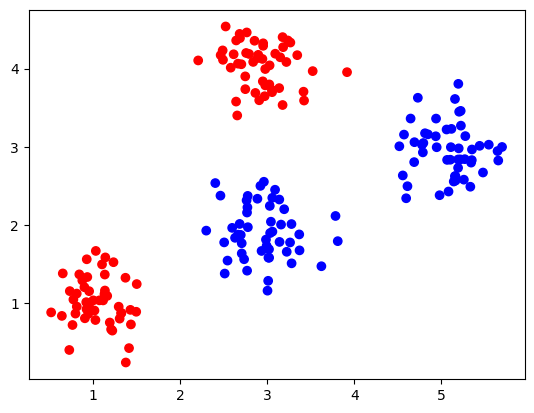

In [72]:
colr = np.where(y==0,'blue','red')
plt.scatter(X[:,0],X[:,1],color=colr)
plt.show()

In [3]:
X.shape

(200, 2)

In [4]:
y.shape

(200,)

Decision Trees.

Entropy = -(np/ntlog2(np/nt) + (1-np/nt)log2(1-np/nt) )

Information gain =  Entropy(R) - (np/ntEntropy(Left) + (1-np/nt)Entropy(Right))

In [5]:
def Entropy(p):
    if(p == 1 or p == 0):
        return 0 
    return -(p*(np.log2(p)) + (1-p)*(np.log2(1-p)))
    

In [6]:
p = 200/1000

In [7]:
Entropy(p)

0.7219280948873623

In [8]:
def Information_gain(root_one,left_one,total,left_total):
    
    p = root_one/total 
    lc = left_one/left_total 
    rc = (root_one-left_one)/(total-left_total) if (total-left_total) != 0 else 0 
    E = Entropy(p)
    El = Entropy(lc)
    Er = Entropy(rc)
    g = (left_total/total)
    

    return E - (g*El + (1-g)*Er) 
    
    

In [9]:
Information_gain(200,50,1000,100)

0.03690791540384364

In [10]:
mn_f = X[:,0].min() 
mx_f = X[:,0].max()
rng = np.arange(mn_f,mx_f+1.0,1.0)

In [11]:
rng

array([0.51931451, 1.51931451, 2.51931451, 3.51931451, 4.51931451,
       5.51931451, 6.51931451])

In [12]:
Left_child1 = X[X[:,0]<=rng[0]]

In [13]:
Left_child1_y = y[X[:,0]<=rng[0]]

In [14]:
Left_child1_y

array([1], dtype=int64)

In [15]:
Left_child2 = X[X[:,0]<=rng[1]]

In [16]:
Left_child2_y = y[X[:,0]<=rng[1]]

In [17]:
Left_child2_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
ones = np.bincount(Left_child2_y)

In [19]:
ones

array([ 0, 50], dtype=int64)

In [20]:
root_ones = np.bincount(y)

In [21]:
root_ones

array([100, 100], dtype=int64)

In [22]:
left_total = Left_child2.shape[0]

In [23]:
toatl = X.shape[0]

In [24]:
Information_gain(root_ones[1],ones[1],toatl,left_total)

0.31127812445913283

IG gain on Feature0 split on rng2 = 0.3112

In [26]:
def split(X,Y,i,gaps):
    mn_f = X[:,i].min() 
    mx_f = X[:,i].max()
    rng = np.linspace(mn_f, mx_f, gaps)
    ig = 0 
    idx = -1 
    for j in rng:
        Left_child = Y[X[:,i]<=j]
        ones_left = np.bincount(Left_child,minlength=2)[1]
        ones_root = np.bincount(Y)[1]
        left_total = Left_child.shape[0]
        total = X.shape[0]
        ig_gain = Information_gain(ones_root,ones_left,total,left_total)
        
        if ig_gain>ig:
            ig = ig_gain 
            idx = j 
    return ig,idx 
        
        
    

In [28]:
split(X,y,0,3)

(0.20398688336877213, 3.107279041054527)

In [29]:
split(X,y,1,5)

(0.2296947227004249, 3.464777229728959)

In [137]:
d = {}
n = X.shape[0]
def recurr(X,Y,lvl):
    p = Y[Y==1].shape[0]/Y.shape[0]
    E = Entropy(p)
    
    if E<0.3:
        label = 0 
        if p>0.5:
            label = 1 
        d[lvl] = {'state': 'leaf', 'label': label}
        return 
    ig_gain  = 0
    feature = 0
    val = 0 
    for i in range(X.shape[1]):
        ig,value = split(X,Y,i,10)
        if ig >ig_gain:
            ig_gain = ig 
            feature = i
            val = value
   
    left_x = X[X[:,feature]<=val]
    left_y = Y[X[:,feature]<=val]
    right_x = X[X[:,feature]>val]
    right_y = Y[X[:,feature]>val]
    if left_x.shape[0] == 0 or right_x.shape[0] == 0:
        label = 0 
        if p>0.5:
            label = 1 
        d[lvl] = {'state': 'leaf', 'label': label}
        return 
    if lvl not in d:
        d[lvl] = ""
    d[lvl] += f"State- Internal Node , Question -{feature,val}"
    if ig_gain<0.004:
        label = 0 
        if p>0.5:
            label = 1 
        d[lvl] = {'state': 'leaf', 'label': label}
        return 
         
    recurr(left_x,left_y,lvl*2 +1)
    recurr(right_x,right_y,lvl*2 +2)
    
    
        

In [138]:
recurr(X,y,0)

In [139]:
d

{0: 'State- Internal Node , Question -(0, 2.2446241983360977)',
 1: {'state': 'leaf', 'label': 1},
 2: 'State- Internal Node , Question -(1, 3.41286982297988)',
 5: {'state': 'leaf', 'label': 0},
 6: 'State- Internal Node , Question -(0, 3.9959038117507273)',
 13: {'state': 'leaf', 'label': 1},
 14: {'state': 'leaf', 'label': 0}}

In [25]:
class Decision_Tree:
    def __init__(self,val=None,f=None,leaf=False):
        self.data = val
        self.feature = f
        self.is_leaf = leaf
        self.left = None
        self.right = None
        self.label = None
        self.ig = None 
        
    def Entropy(self,p):
        
        if(p == 1 or p == 0):
            
            return 0
        
        return -(p*(np.log2(p)) + (1-p)*(np.log2(1-p)))

    def Information_gain(self,root_one,left_one,total,left_total):
        p = root_one/total if total != 0 else 0 
        lc = left_one/left_total if left_total != 0 else 0 
        rc = (root_one-left_one)/(total-left_total) if (total-left_total) != 0 else 0 
        E = self.Entropy(p)
        El = self.Entropy(lc)
        Er = self.Entropy(rc)
        g = (left_total/total)

        return E - (g*El + (1-g)*Er)
    def best_split(self,X,Y,f,gaps):
        total = X.shape[0]
        root_ones = Y[Y==1].shape[0]
        mn = X[:,f].min()
        mx = X[:,f].max()
        feature_space = np.linspace(mn,mx,gaps)
        ig =0 
        thresh=0
        for j in feature_space:
            idx = X[:,f] < j
            Left_child = Y[idx]
            left_ones = Left_child[Left_child==1].shape[0]
            ig_gain = self.Information_gain(root_ones,left_ones,total,Left_child.shape[0])
            if ig_gain>ig:
                ig = ig_gain
                thresh = j 
        return ig,thresh


    def Grow_Tree(self,X,Y):
        p = Y[Y==1].shape[0]/Y.shape[0]
        E = self.Entropy(p)
        if E<0.1:
            self.is_leaf = True 
            if p>0.5:
                self.label = 1 
            else:
                self.label = 0 
            return
        ig_gain  = 0
        feature = 0
        val = 0 
        for i in range(X.shape[1]):
          
            ig,value = self.best_split(X,Y,i,10)
            
            if ig >ig_gain:
                
                ig_gain = ig 
                feature = i
                val = value
        left_x = X[X[:,feature]<val]
        left_y = Y[X[:,feature]<val]
        right_x = X[X[:,feature]>=val]
        right_y = Y[X[:,feature]>=val]
        #print(f"ig_gain-{ig_gain} feature-{feature} ,left_shape-{left_x.shape}, right_shape-{right_x.shape}")

        if left_x.shape[0] == 0 or right_x.shape[0] == 0 or ig_gain <0.004:
            
            self.is_leaf = True 
            if p>0.5:
                self.label = 1 
            else:
                self.label = 0 
            return
        self.data = val
        self.feature = feature
        self.ig = ig_gain 
        self.left = Decision_Tree()
        self.right = Decision_Tree()
        self.left.Grow_Tree(left_x,left_y)
        self.right.Grow_Tree(right_x,right_y)
        
    def predict_point(self,p):
        if self.is_leaf:
            return self.label 
        if p[self.feature] <= self.data:
            return self.left.predict_point(p)
        else:
            return self.right.predict_point(p)
        
        
    def predict(self,X):
        preds = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            prediction = self.predict_point(X[i])
            preds[i] = prediction 
        return preds 

             
             
         

    
        
        

In [26]:
X.shape

(200, 2)

In [73]:
X_train,X_test = X[:160],X[160:]

In [74]:
Y_train,Y_test = y[:160],y[160:]

In [75]:
Y_train.shape

(160,)

In [76]:
X_train.shape

(160, 2)

In [77]:
Dc = Decision_Tree()

In [78]:
Dc.Grow_Tree(X_train,Y_train)

In [79]:
y_train_preds  = Dc.predict(X_train)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(Y_train,y_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       100

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [82]:
y_test_preds = Dc.predict(X_test)

In [83]:
print(classification_report(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dc_sk = DecisionTreeClassifier(criterion='entropy')

In [40]:
dc_sk.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
print(classification_report(Y_train,dc_sk.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       100

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [126]:
print(classification_report(Y_test,dc_sk.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.00      0.00      0.00         0

    accuracy                           0.97        40
   macro avg       0.50      0.49      0.49        40
weighted avg       1.00      0.97      0.99        40



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from matplotlib.colors import ListedColormap

In [84]:
def decision_boudary(X,y,M):
    X1_mn,X1_mx = X[:,0].min()-1,X[:,0].max()+1
    X2_mn,X2_mx = X[:,1].min()-1,X[:,1].max()+1 
    X_grid,Y_grid = np.meshgrid(np.arange(X1_mn,X1_mx,0.1),np.arange(X2_mn,X2_mx,0.1))
    Z = np.zeros(X_grid.shape)
    for i in range(X_grid.shape[0]):
        for j in range(X_grid.shape[1]):
            arr = np.array([[X_grid[i,j],Y_grid[i,j]]])
            pred = M.predict(arr)
            Z[i,j] = pred 
    plt.contourf(X_grid,Y_grid,Z,alpha=0.75,cmap='bwr')
    plt.xlim(X_grid.min(),X_grid.max())
    plt.ylim(Y_grid.min(),Y_grid.max())
    colr = np.where(y==0,'blue','red')
    plt.scatter(X[:,0],X[:,1],color=colr)
    plt.show()
    

C:\Users\Nimisha Manawat\AppData\Local\Temp\ipykernel_9372\1559891664.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = pred


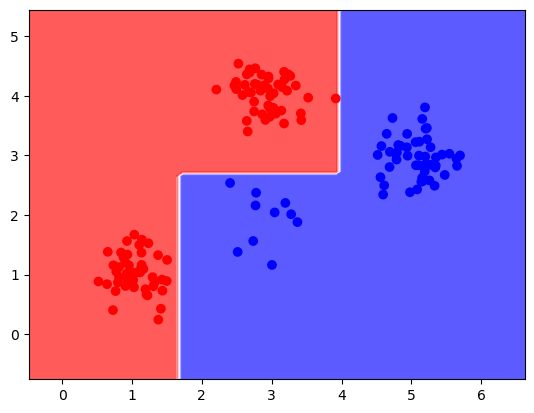

In [85]:
decision_boudary(X_train,Y_train,Dc)